In [1]:
import rioxarray

In [2]:
try:
    # 使用rioxarray.open_rasterio()函数读取DEM文件
    # 请将 'path/to/your/dem_file.tif' 替换为您的实际文件路径
    dem_data = rioxarray.open_rasterio(r'h:\data\DEM\ASTGTM2_N23E111_dem.tif')

    # 打印加载的数据以进行验证
    print("高程DEM数据已成功读取:")
    print(dem_data)

except FileNotFoundError:
    print("错误: 未找到指定的文件. 请检查文件路径是否正确.")
except Exception as e:
    print(f"读取文件时发生错误: {e}")

高程DEM数据已成功读取:
<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 111.0 111.0 111.0 111.0 ... 112.0 112.0 112.0
  * y            (y) float64 29kB 24.0 24.0 24.0 24.0 ... 23.0 23.0 23.0 23.0
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_DOCUMENTNAME:      created at
    TIFFTAG_IMAGEDESCRIPTION:  SILC TIFF
    TIFFTAG_SOFTWARE:          IDL 7.1.1, ITT Visual Information Solutions
    TIFFTAG_DATETIME:          2011:03:15 17:54:40
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    scale_factor:              1.0
    add_offset:                0.0


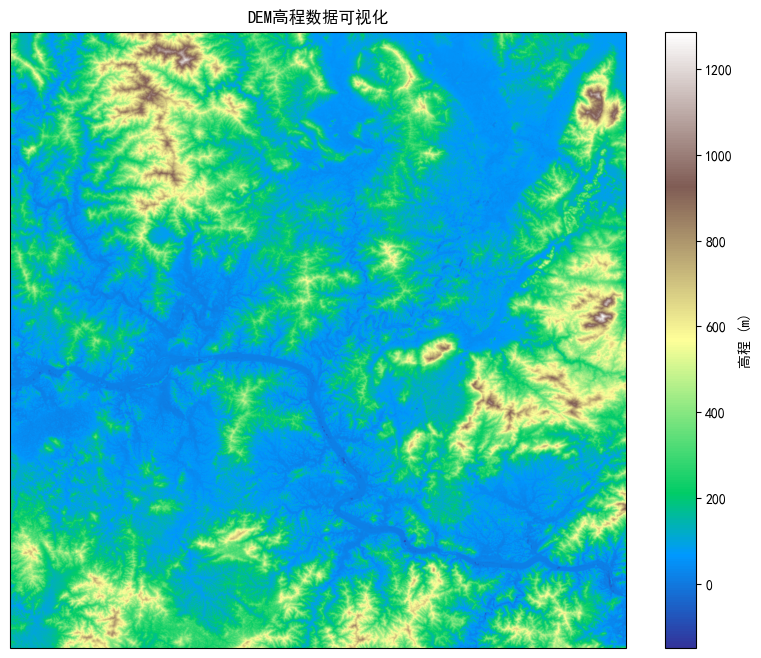

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# 设置中文显示
plt.rcParams['font.family'] = ['SimHei']

# 获取dem_data的经纬度范围
left, bottom, right, top = dem_data.rio.bounds()
extent = [left, right, bottom, top]

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())

# 绘制DEM数据
img = ax.imshow(
    dem_data.squeeze(),  # 去掉多余的维度
    origin='upper',
    extent=extent,
    cmap='terrain',
    transform=ccrs.PlateCarree()
)

ax.coastlines(resolution='10m')
ax.set_title("DEM高程数据可视化")
plt.colorbar(img, ax=ax, label='高程 (m)')
plt.show()
